<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/demo/colab/blending_demo_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download repo:

In [15]:
!git clone https://github.com/lofrienger/Single_SurgicalScene_For_Segmentation.git

fatal: destination path 'Single_SurgicalScene_For_Segmentation' already exists and is not an empty directory.


Foreground image to foreground:

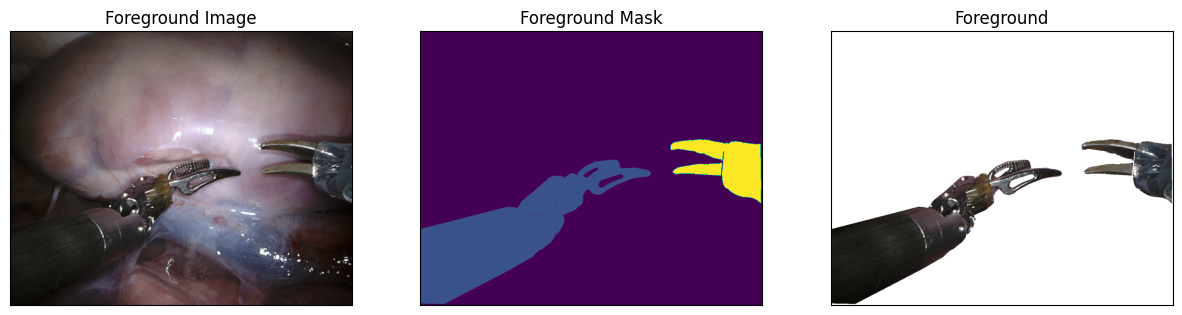

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fg_img = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/foreground/1-Bipolar_Forceps/image_3/seq_10_frame017.png')
fg_mask = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/foreground/1-Bipolar_Forceps/mask/seq_10_frame017.png')

# fg_img = Image.open('../data_gen/foreground/1-Bipolar_Forceps/image_3/seq_10_frame017.png')
# fg_mask = Image.open('../data_gen/foreground/1-Bipolar_Forceps/mask/seq_10_frame017.png')
images = np.expand_dims(np.array(fg_img), axis=0)
segmaps = np.expand_dims(np.array(fg_mask), axis=0)
segmaps = np.expand_dims(segmaps, axis=3)
images = np.squeeze(images)
segmaps = np.squeeze(segmaps)
image_pil = Image.fromarray(images).convert('RGBA')
mask_pil = Image.fromarray(segmaps).convert('RGBA')

image_np = np.array(image_pil)
mask_np = np.array(mask_pil)

image_np[mask_np[:,:,:]==0] = 255
fg = Image.fromarray(image_np)

num_img = 3
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(fg_img)
ax[0].set_title('Foreground Image')
ax[1].imshow(fg_mask)
ax[1].set_title('Foreground Mask');
ax[2].imshow(fg, cmap='gray')
ax[2].set_title('Foreground');

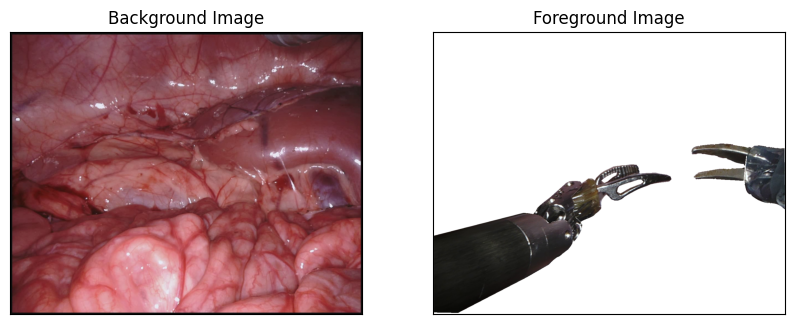

In [17]:
bg = Image.open('/content/Single_SurgicalScene_For_Segmentation/data_gen/background/raw/3-frame020.png')#.convert('RGBA')
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(bg)
ax[0].set_title('Background Image')
ax[1].imshow(fg)
ax[1].set_title('Foreground Image');

Blend images and create corresponding mask:

datas (1280, 1024)


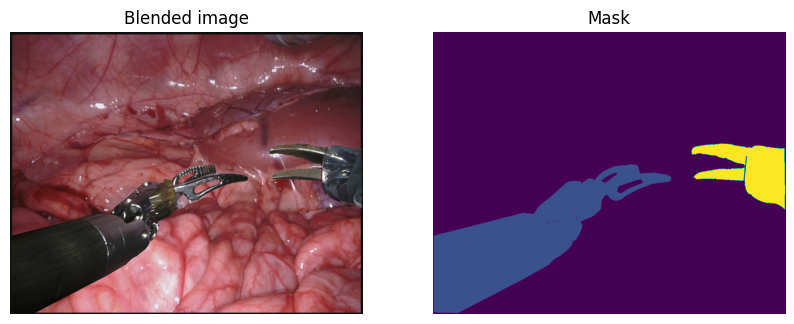

In [31]:
# make fg transparent
image_pos = Image.fromarray(image_np)
datas = image_pos.getdata()
print('datas', datas.size)
newData = []
for items in datas:
    if items[0] == 255 and items[1] == 255 and items[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(items)
image_pos.putdata(newData)

# blend via paste
blended = bg.copy()
blended.paste(image_pos, image_pos)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.axis('off')
plt.title('Blended image')
plt.imshow(blended)
plt.subplot(122)
plt.axis('off')
plt.title('Mask')
plt.imshow(fg_mask)

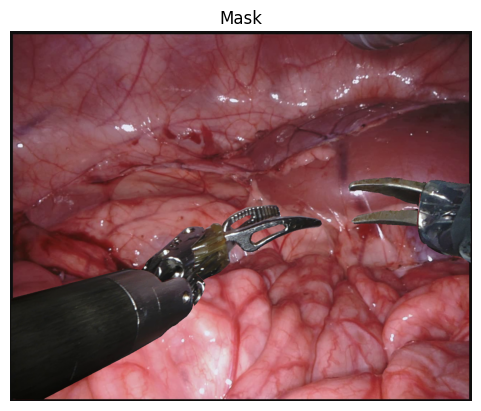

In [33]:
plt.axis('off')
# plt.title('Mask')
plt.imshow(blended)
plt.savefig('blended.png', bbox_inches='tight', dpi=100)

In [53]:
import cv2
cv2.imwrite('mask.png', np.array(fg_mask))
img = cv2.cvtColor(np.array(blended), cv2.COLOR_BGR2RGB)
cv2.imwrite('img.png', img)
# print(np.unique(np.array(fg_mask)))
# plt.axis('off')
# plt.title('Mask')
# plt.imshow(fg_mask, cmap='gray')
# plt.savefig('mask.png', bbox_inches='tight', dpi=100)

True

[0 5 9]


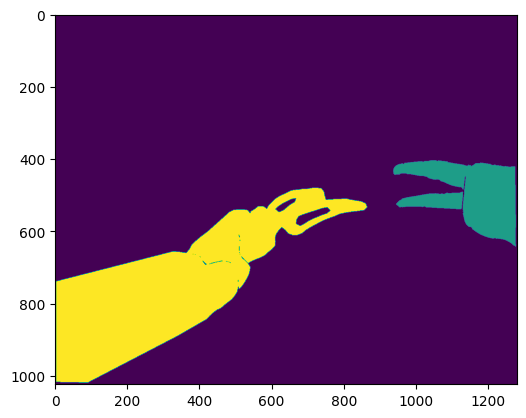

In [51]:
fg_mask_np = np.array(fg_mask)
fg_mask_np[fg_mask_np==4]=5
fg_mask_np[fg_mask_np==1]=9
print(np.unique(fg_mask_np))
plt.imshow(fg_mask_np)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

colors = [(0, 0, 0),   # Background (black)
          (255, 0, 0), # Class 1 (red)
          (0, 255, 0), # Class 2 (green)
          (0, 0, 255), # Class 3 (blue)
          (255, 255, 0), # Class 4 (yellow)
          (255, 0, 255), # Class 5 (magenta)
          (0, 255, 255), # Class 6 (cyan)
          (128, 128, 128)] # Class 7 (gray)

[0 1 4]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

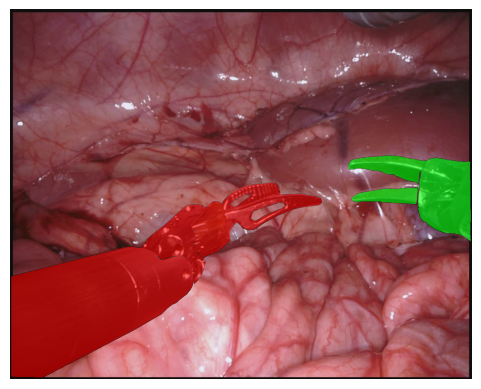

In [56]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.figure().clear()
plt.figure().clear()
plt.clf()

colors = [(0, 0, 0),   # Background (black)
          (255, 0, 0), # Class 1 (red)
          (0, 255, 0), # Class 2 (green)
          (0, 0, 255), # Class 3 (blue)
          (255, 255, 0), # Class 4 (yellow)
          (255, 0, 255), # Class 5 (magenta)
          (0, 255, 255), # Class 6 (cyan)
          (128, 128, 128)] # Class 7 (gray)

# colors = [(240, 248, 255),   # Background (light blue)
# (220, 220, 220), # Class 1 (light gray)
# (143, 188, 143), # Class 2 (dark sea green)
# (135, 206, 235), # Class 3 (sky blue)
# (255, 215, 0), # Class 4 (gold)
# (255, 192, 203), # Class 5 (pink)
# (224, 255, 255), # Class 6 (light cyan)
# (192, 192, 192)] # Class 7 (silver)

def show_mask(mask, ax, color):
    color = np.array([color[0]/255, color[1]/255, color[2]/255, 0.6])
    h, w = mask.shape[:2]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


img = cv2.imread('img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure()
# plt.axis('off')
# plt.imshow(img)


mask = cv2.imread('mask.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(img)

classes = np.unique(mask)
print(classes)
for i, cls in enumerate(classes):
    if cls == 0:
        continue
    show_mask(mask == cls, plt.gca(), color=colors[i])